In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

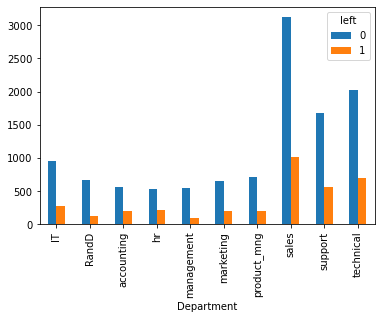

In [5]:
pd.crosstab(df['Department'],df['left']).plot(kind="bar")

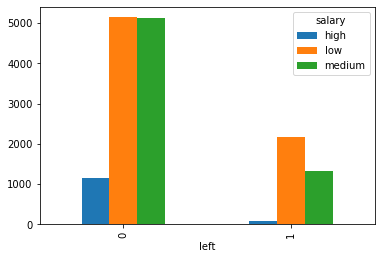

In [6]:
pd.crosstab(df['left'],df['salary']).plot(kind="bar")

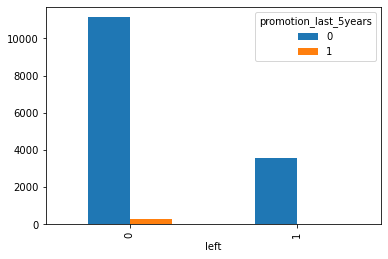

In [10]:
pd.crosstab(df['left'],df['promotion_last_5years']).plot(kind="bar")

In [15]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [40]:
x=df[['salary','average_montly_hours','satisfaction_level','promotion_last_5years']]
x

,salary,average_montly_hours,satisfaction_level,promotion_last_5years
0,low,157,0.38,0
1,medium,262,0.80,0
2,medium,272,0.11,0
3,low,223,0.72,0
4,low,159,0.37,0
...,...,...,...,...
14994,low,151,0.40,0
14995,low,160,0.37,0
14996,low,143,0.37,0
14997,low,280,0.11,0


In [17]:
x.isnull().any()

salary                   False
average_montly_hours     False
satisfaction_level       False
promotion_last_5years    False
dtype: bool

In [18]:
y=df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [23]:
dummies=pd.get_dummies(df['salary'])
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [41]:
x=pd.concat([x,dummies],axis=1)
x.head()

,salary,average_montly_hours,satisfaction_level,promotion_last_5years,high,low,medium
0,low,157,0.38,0,0,1,0
1,medium,262,0.80,0,0,0,1
2,medium,272,0.11,0,0,0,1
3,low,223,0.72,0,0,1,0
4,low,159,0.37,0,0,1,0


In [42]:
x=x.drop('low',axis=1)

In [43]:
x.head()

,salary,average_montly_hours,satisfaction_level,promotion_last_5years,high,medium
0,low,157,0.38,0,0,0
1,medium,262,0.80,0,0,1
2,medium,272,0.11,0,0,1
3,low,223,0.72,0,0,0
4,low,159,0.37,0,0,0


In [47]:
x=x.drop('salary',axis=1)

In [48]:
x.head()

,average_montly_hours,satisfaction_level,promotion_last_5years,high,medium
0,157,0.38,0,0,0
1,262,0.80,0,0,1
2,272,0.11,0,0,1
3,223,0.72,0,0,0
4,159,0.37,0,0,0


In [52]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [53]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [54]:
len(x_train)

10499

In [55]:
len(x_test)

4500

In [56]:
x_train.head()

,average_montly_hours,satisfaction_level,promotion_last_5years,high,medium
10688,261,0.76,0,0,1
14075,217,0.77,0,0,1
2607,242,0.50,0,1,0
837,308,0.09,0,0,0
2325,206,0.58,0,0,1


In [57]:
model=linear_model.LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression()

In [59]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
y_test

34       1
427      1
3142     0
3788     0
13885    0
        ..
14959    1
6710     0
8516     0
14022    0
2687     0
Name: left, Length: 4500, dtype: int64

In [61]:
model.score(x_test,y_test)

0.7802222222222223